# CM2604 - Machine Learning Coursework


##### Thiseni Paththamperuma - 20220256 / 2312544

## Install Packages

In [1]:
# !pip install ucimlrepo
# !pip install imbalanced-learn

## Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Load the dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch  the dataset 
adult = fetch_ucirepo(id=2) 
  
# get data as a panadas frame
X = adult.data.features 
y = adult.data.targets 
  
# metadata infor
print(adult.metadata) 
  
# variable infor
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Display Data
### The data are already divided into features and target

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [6]:
print(X.shape)  
print(y.shape)  


(48842, 14)
(48842, 1)


## Merge dataframes

In [7]:
merged_data = pd.concat([X, y], axis=1) #Dataframe that will be preprocessed
before_data = pd.concat([X, y], axis=1) #For before and after comparisons later in the code


In [8]:
merged_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
merged_data.shape

(48842, 15)

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Look at Dataset

In [11]:
for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values for workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values for fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values for education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' '

## Data Cleaning and Preprocessing

### Income is in 2 formats therefore replace with correct values

In [12]:
# Replace values in 'income' column
merged_data['income'] = merged_data['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
before_data['income'] = merged_data['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

In [13]:
unique_values = merged_data['income'].unique()
print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for income:
['<=50K' '>50K']



### There are some null values and some values with '?' . Change all '?' to null

In [14]:
# Find '?' in rows
question_mark_count = (merged_data == '?').sum()

# Find NaN values
nan_count = merged_data.isnull().sum()

print(f"Count of '?' values:\n{question_mark_count}\n")
print(f"Count of NaN values:\n{nan_count}\n")


Count of '?' values:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Count of NaN values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64



In [15]:
# Replace '?' with NaN
merged_data.replace('?', pd.NA, inplace=True)


In [16]:
nan_count = merged_data.isnull().sum()
print(nan_count)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


### Handle null values. Fill them

In [17]:
# Fill NaN values in 'workclass' column with 'unknown'
merged_data['workclass'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1612\1735188071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['workclass'].fillna('unknown', inplace=True)


In [18]:
merged_data['workclass'].value_counts()


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [19]:
# Fill NaN values in 'occupation' column with 'unknown'
merged_data['occupation'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1612\2477295202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['occupation'].fillna('unknown', inplace=True)


In [20]:
merged_data['occupation'].value_counts()


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [21]:
# Fill NaN values in 'native-country' column with 'unknown'
merged_data['native-country'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1612\790626218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['native-country'].fillna('unknown', inplace=True)


In [22]:
merged_data['native-country'].value_counts()


native-country
United-States                 43832
Mexico                          951
unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [23]:
# Check again for confirmation
nan_count = merged_data.isnull().sum()
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Check for duplicate rows of data

In [24]:
duplicates = merged_data[merged_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

# No of duplicate rows
duplicate_count = duplicates.shape[0]

print("Number of Duplicate Rows:", duplicate_count)



Duplicate Rows:
       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44        

In [25]:
merged_data = merged_data.drop_duplicates()

In [26]:
duplicates = merged_data[merged_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)
duplicate_count = duplicates.shape[0]

print("Number of Duplicate Rows:", duplicate_count)


Duplicate Rows:
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []
Number of Duplicate Rows: 0


In [27]:
merged_data.shape

(48790, 15)

## Check columns one by one and Analyze

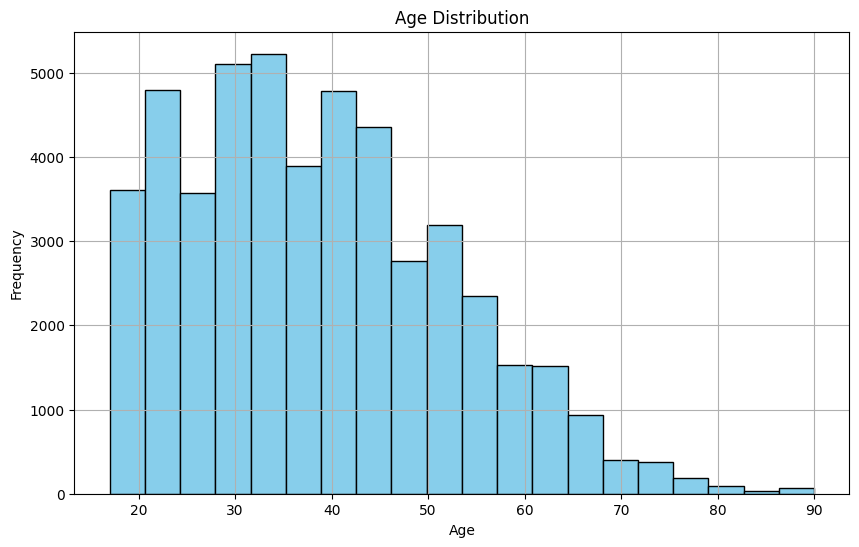

In [28]:
# Plot Age histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

### Age is skewed therefore finding appropriate way to handle the outlier

In [29]:
merged_data['age'].value_counts()

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [30]:
merged_data.loc[merged_data['age'] >=80]['age'].value_counts()


age
90    54
80    38
81    37
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

### From 82 age count lower so getting average from 82-90 and filling that range with that value

In [31]:
# Calculate average age for 82-90
age_avg = merged_data[(merged_data['age'] >= 82) & (merged_data['age'] <= 90)]['age'].mean()

# Make it whole number
age_avg = round(age_avg)
print(age_avg)

# Fill ages between 82-90 with average age
merged_data.loc[(merged_data['age'] >= 82) & (merged_data['age'] <= 90), 'age'] = age_avg


87


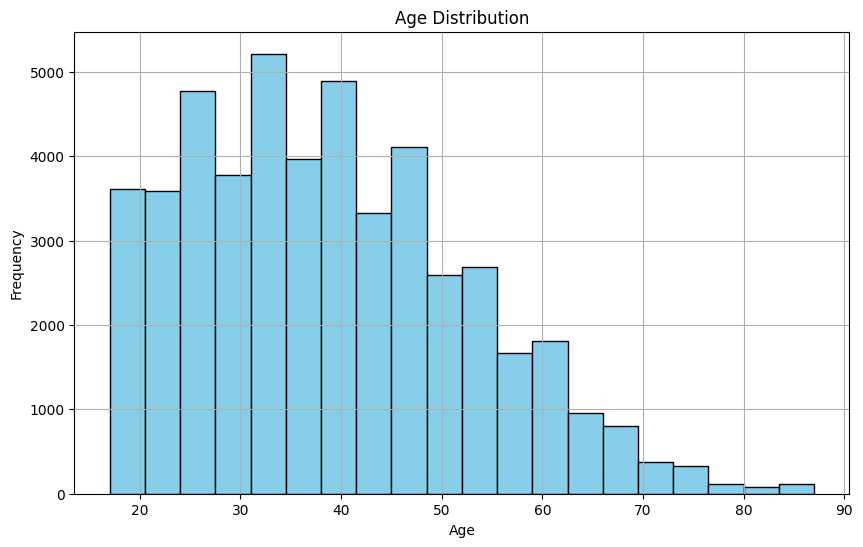

In [32]:
#Age histogram after handling outlier
plt.figure(figsize=(10, 6))
plt.hist(merged_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

### Boxplots before and after outlier handling

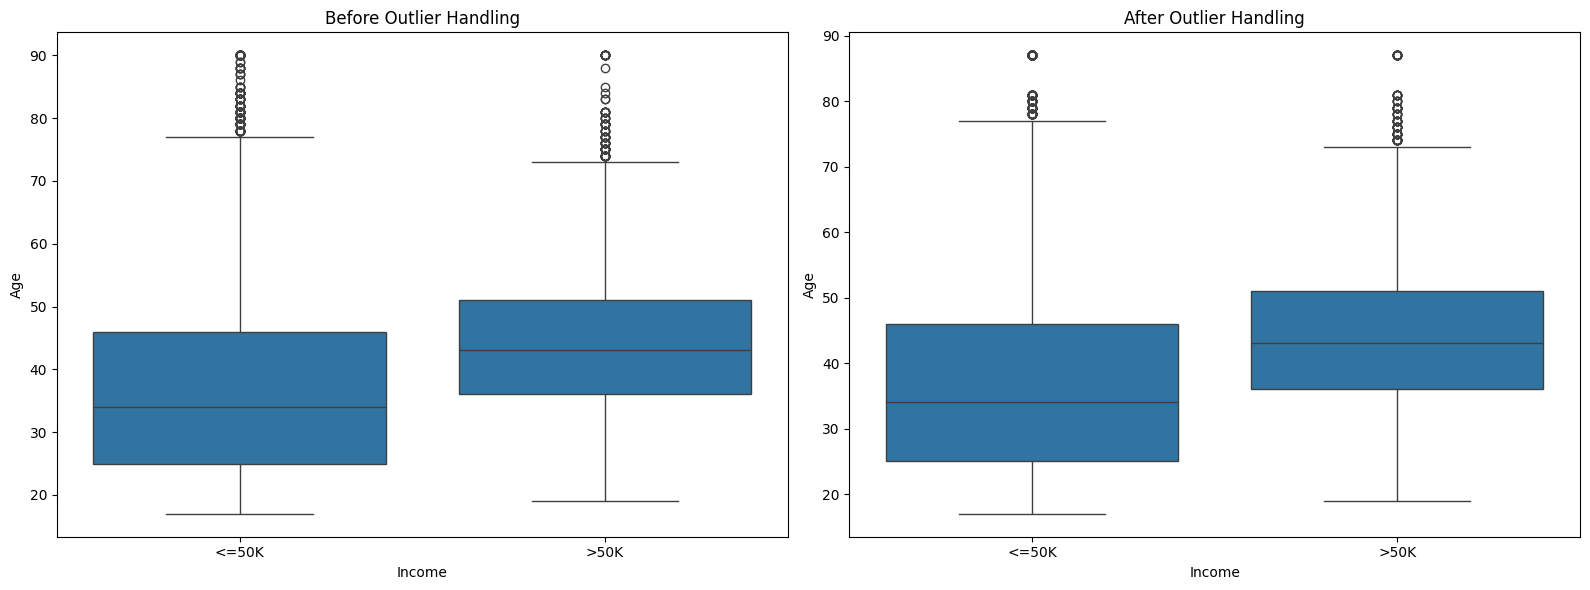

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='income', y='age', data=before_data, ax=axes[0])
axes[0].set_title('Before Outlier Handling')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Age')

sns.boxplot(x='income', y='age', data=merged_data, ax=axes[1])
axes[1].set_title('After Outlier Handling')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()


##### Small change in outliers

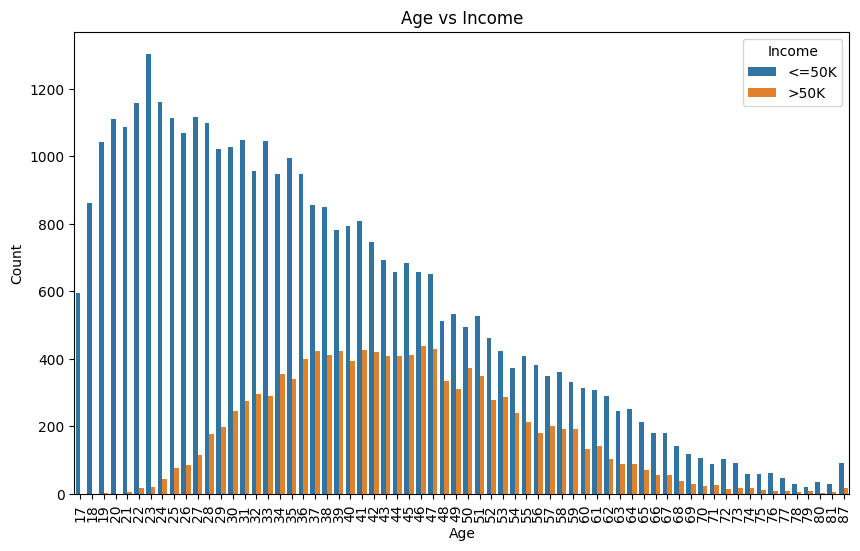

In [34]:
# Age vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='income', data=merged_data)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


## Feature Engineering

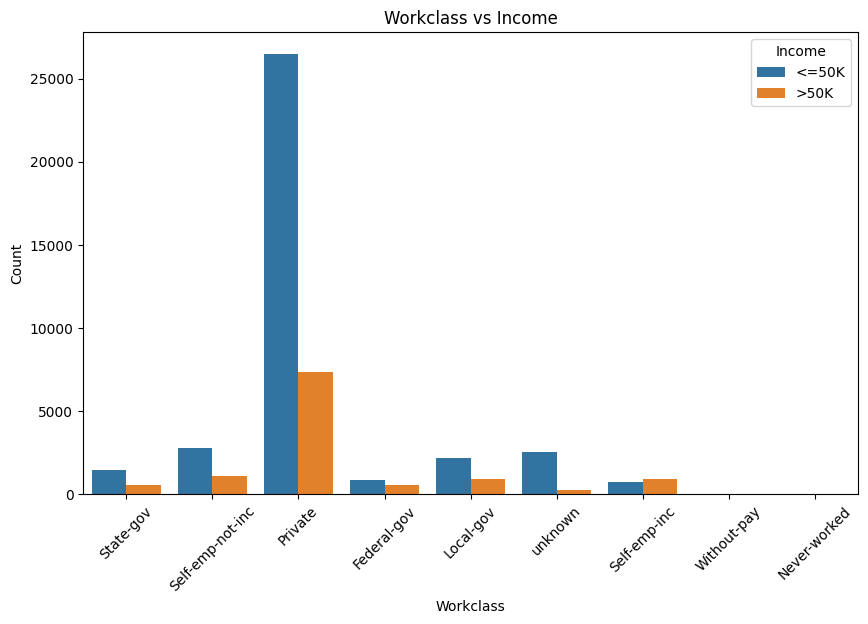

In [35]:
#Workclass vs Income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=merged_data)
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


### Combining categories

In [36]:
merged_data['workclass'] = merged_data['workclass'].replace({
    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Without-pay': 'No-Work',
    'Never-worked': 'No-Work'
})

#unique values after combining categories
print(merged_data['workclass'].unique())


['Government' 'Self-employed' 'Private' 'unknown' 'No-Work']


In [37]:
merged_data['workclass'].value_counts()


workclass
Private          33860
Government        6549
Self-employed     5555
unknown           2795
No-Work             31
Name: count, dtype: int64

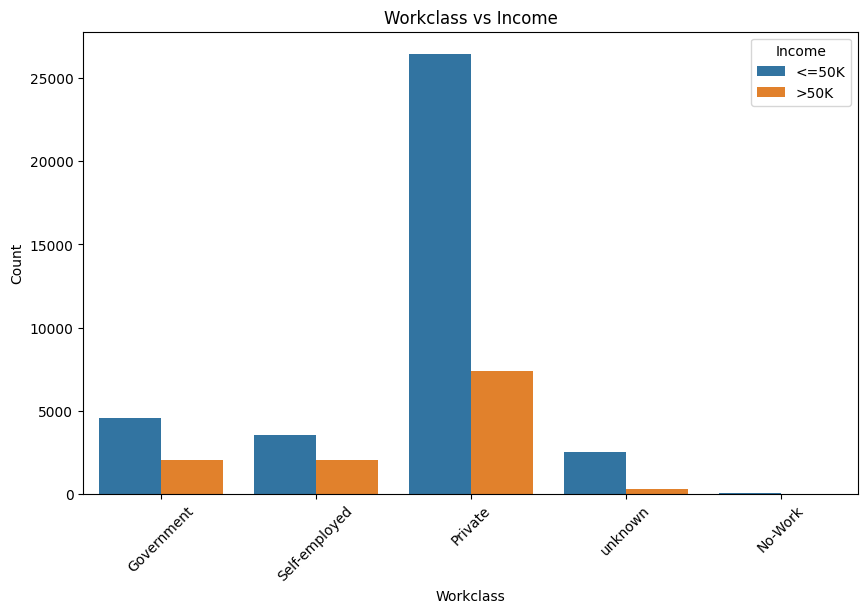

In [38]:
#Workclass vs Income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=merged_data)
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


### Plotting fnlwgt with income

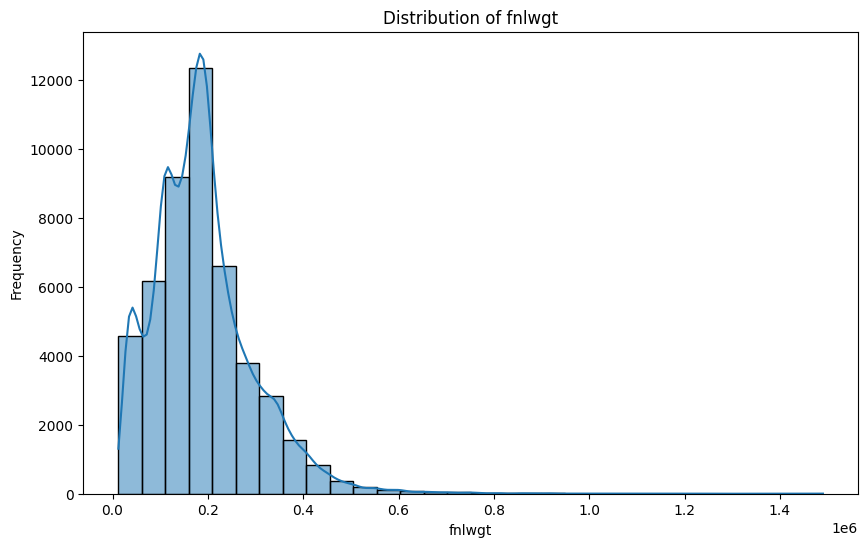

In [39]:
#Histogram for 'fnlwgt'
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='fnlwgt', bins=30, kde=True)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()


In [40]:
merged_data['fnlwgt'].value_counts()


fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
78170      1
279721     1
390867     1
354075     1
350977     1
Name: count, Length: 28523, dtype: int64

### No changes are done in fnlwgt for now

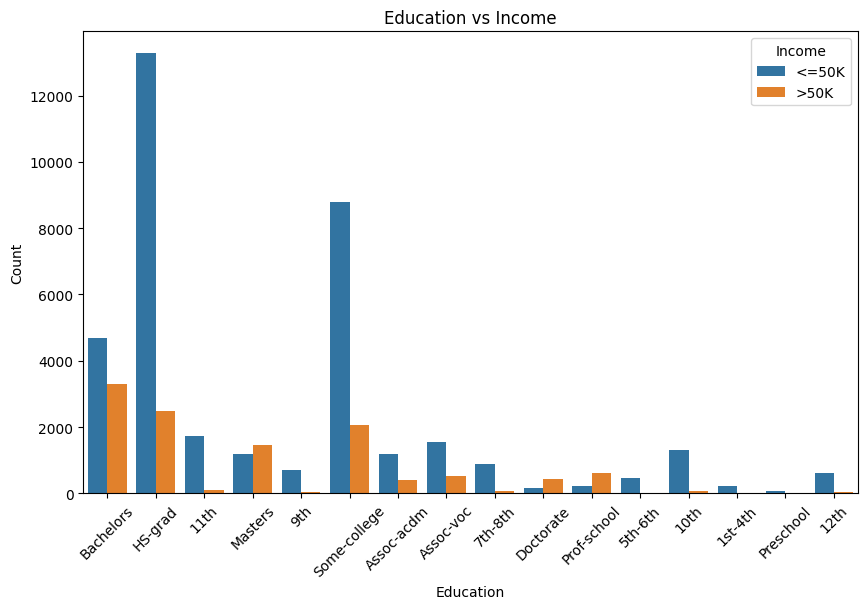

In [41]:
#Education vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=merged_data)
plt.title('Education vs Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [42]:
merged_data['education'].value_counts()


education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

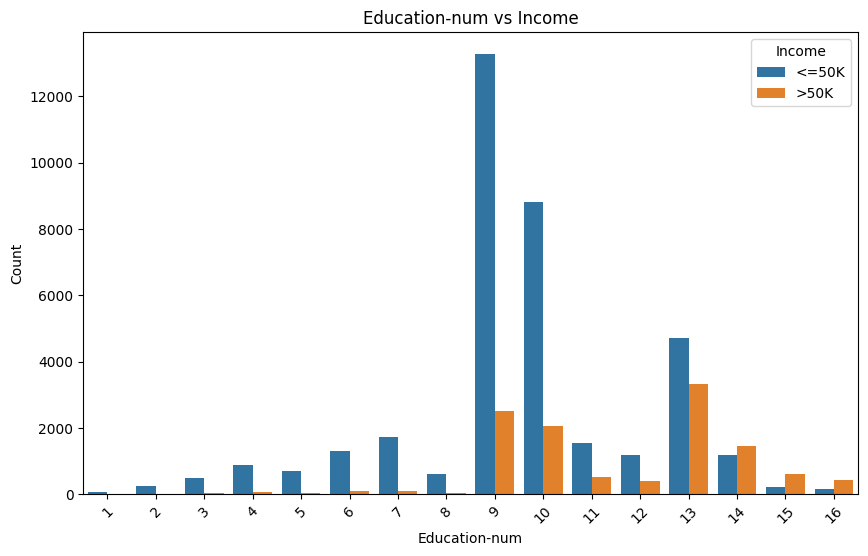

In [43]:
#education-num vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='education-num', hue='income', data=merged_data)
plt.title('Education-num vs Income')
plt.xlabel('Education-num')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [44]:
merged_data['education-num'].value_counts()


education-num
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: count, dtype: int64

##### value counts of education and education-num seems similar

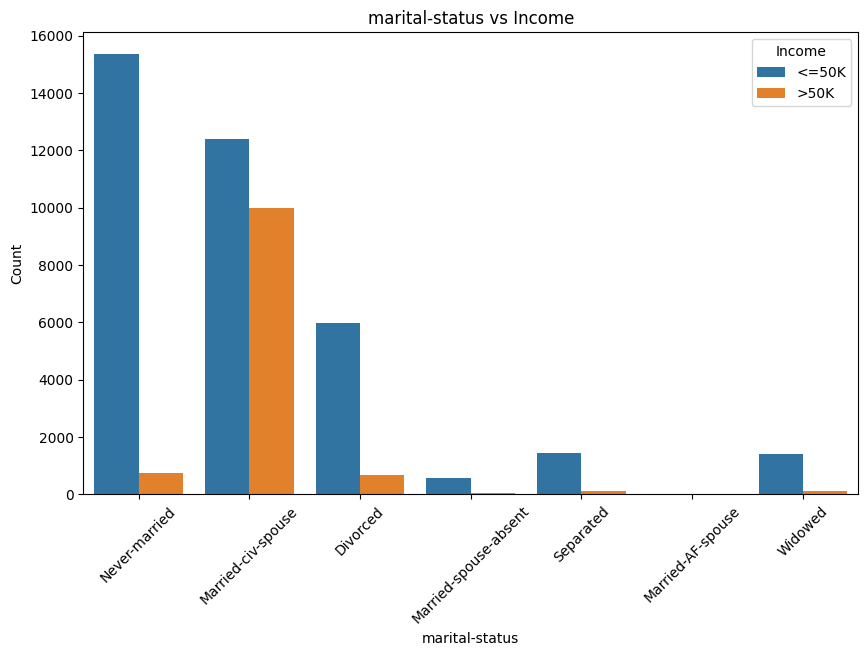

In [45]:
#marital-status vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=merged_data)
plt.title('marital-status vs Income')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [46]:
merged_data['marital-status'].value_counts()


marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

### Combine categories

In [47]:
merged_data['marital-status'] = merged_data['marital-status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Divorced': 'Single',
    'Separated': 'Separated',
    'Widowed': 'Single',
    'Never-married': 'Single'
})

print(merged_data['marital-status'].unique())


['Single' 'Married' 'Separated']


In [48]:
merged_data['marital-status'].value_counts()


marital-status
Single       24230
Married      23030
Separated     1530
Name: count, dtype: int64

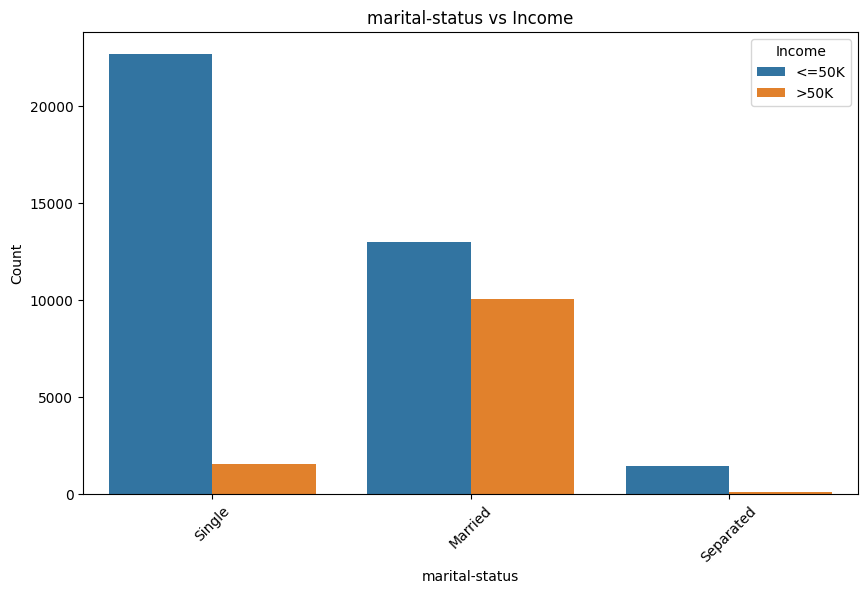

In [49]:
#marital-status vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=merged_data)
plt.title('marital-status vs Income')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


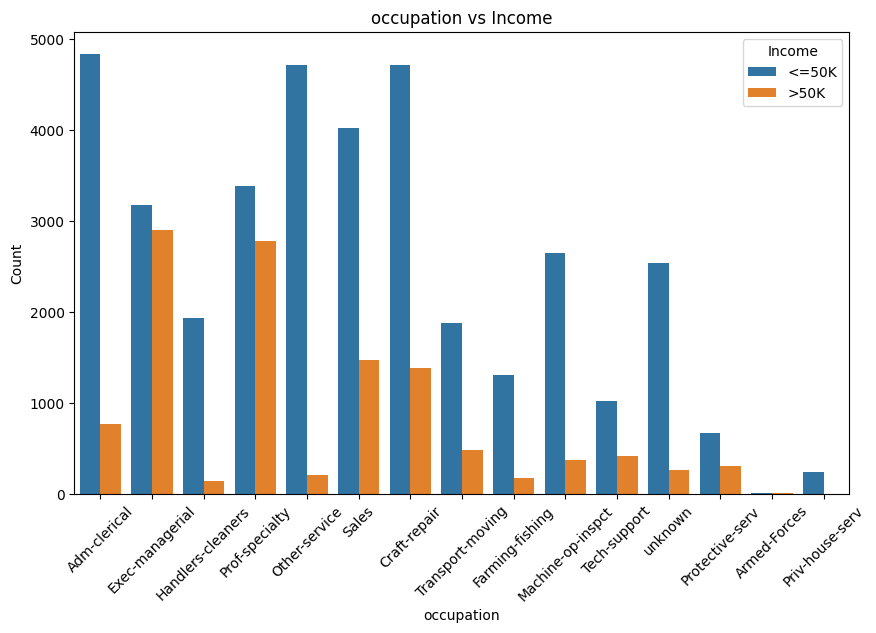

In [50]:
#occupation vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=merged_data)
plt.title('occupation vs Income')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


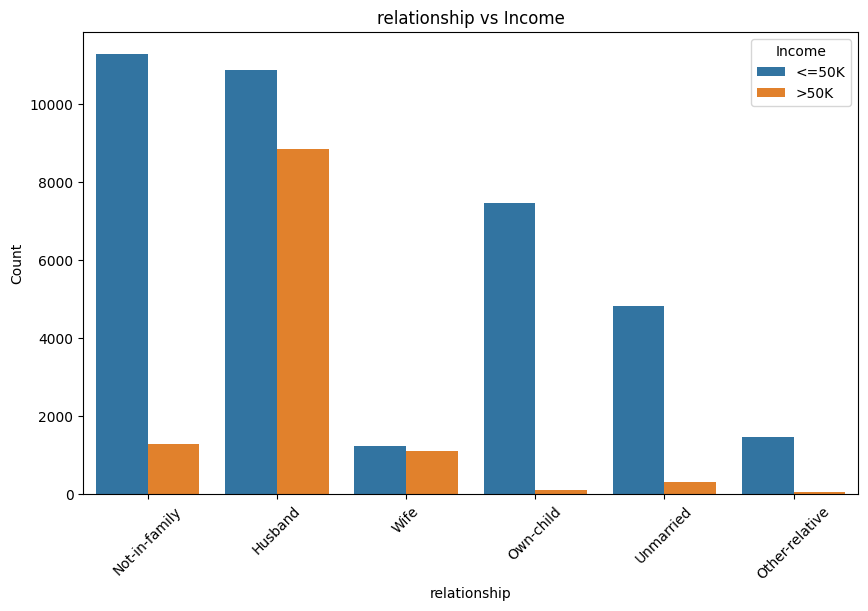

In [51]:
#relationshp vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=merged_data)
plt.title('relationship vs Income')
plt.xlabel('relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


##### Here relationship seems similar to marital status. Husband or wife means married and child can mean single. So we can drop either marital status or relationship. Will be dropped if proved in correlation map

In [52]:
merged_data['relationship'].value_counts()

relationship
Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64

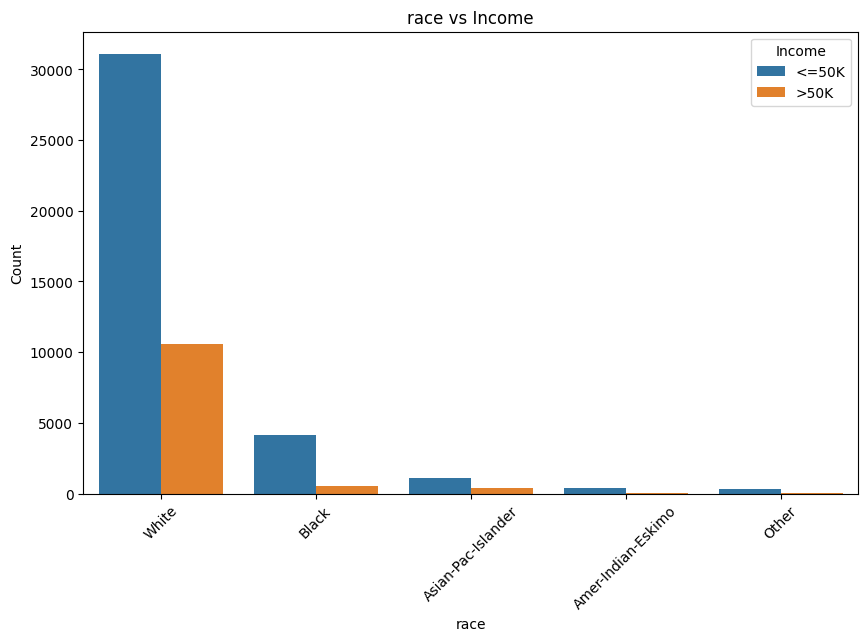

In [53]:
#race vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=merged_data)
plt.title('race vs Income')
plt.xlabel('race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [54]:
merged_data['race'].value_counts()


race
White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

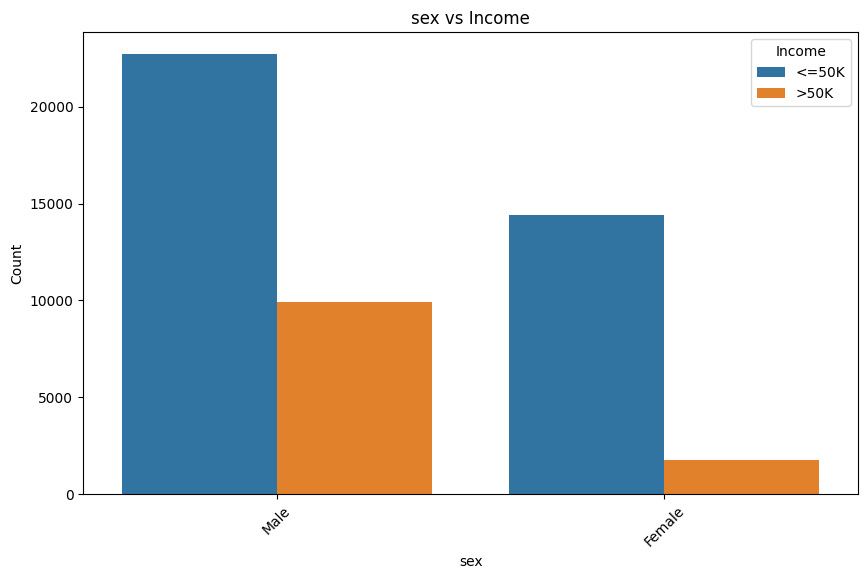

In [55]:
#sex vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=merged_data)
plt.title('sex vs Income')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [56]:
merged_data['sex'].value_counts()


sex
Male      32614
Female    16176
Name: count, dtype: int64

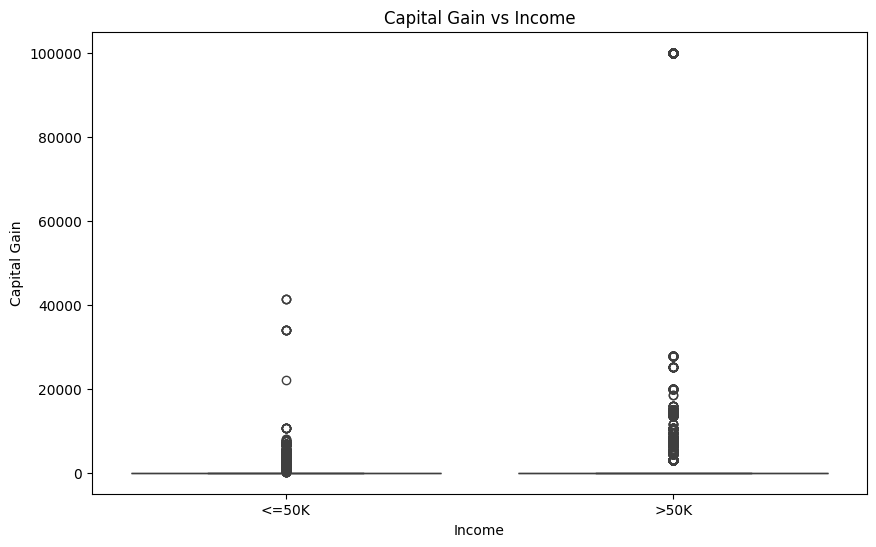

In [57]:
#Capital-gain boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-gain', data=merged_data)
plt.title('Capital Gain vs Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.show()


In [58]:
merged_data['capital-gain'].value_counts()


capital-gain
0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
22040        1
2387         1
1639         1
1111         1
6612         1
Name: count, Length: 123, dtype: int64

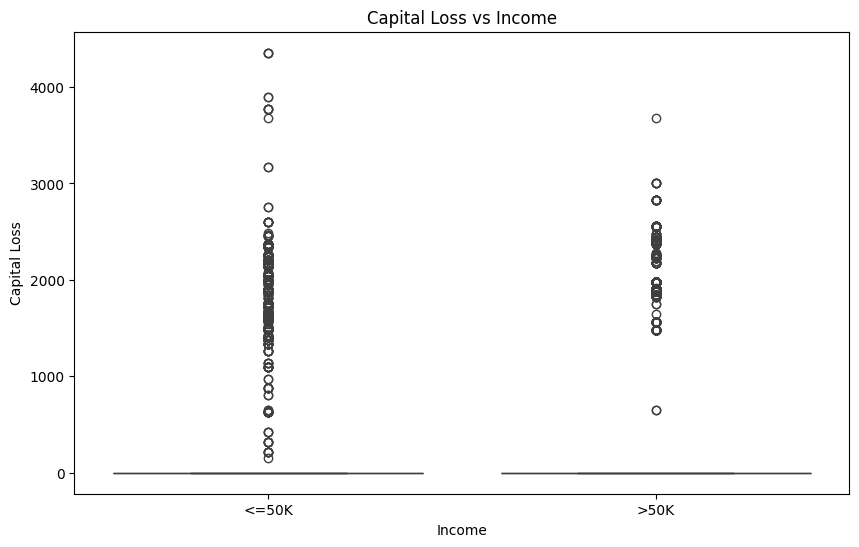

In [59]:
#Boxplot capital loss
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-loss', data=merged_data)
plt.title('Capital Loss vs Income')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.show()


In [60]:
merged_data['capital-loss'].value_counts()


capital-loss
0       46508
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: count, Length: 99, dtype: int64

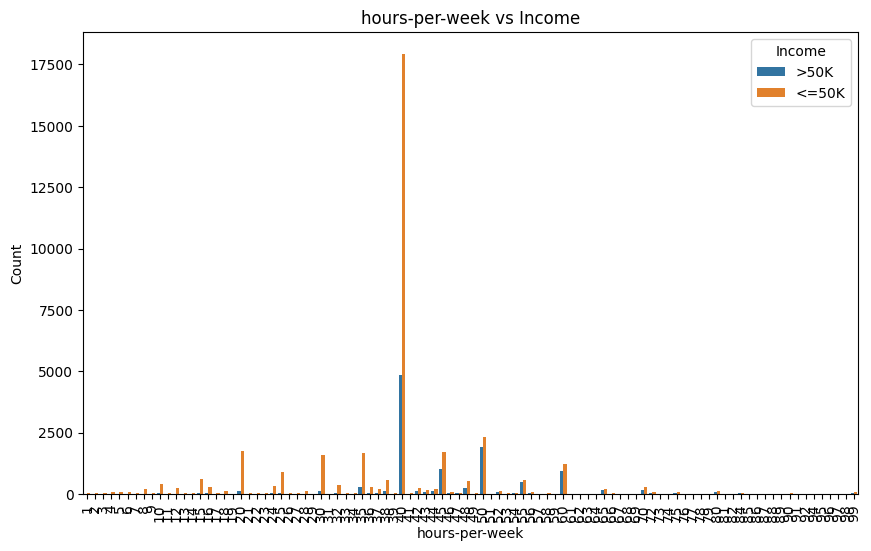

In [61]:
#hours-per-week vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='hours-per-week', hue='income', data=merged_data)
plt.title('hours-per-week vs Income')
plt.xlabel('hours-per-week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


In [62]:
merged_data['hours-per-week'].value_counts()


hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
79        1
94        1
82        1
87        1
69        1
Name: count, Length: 96, dtype: int64

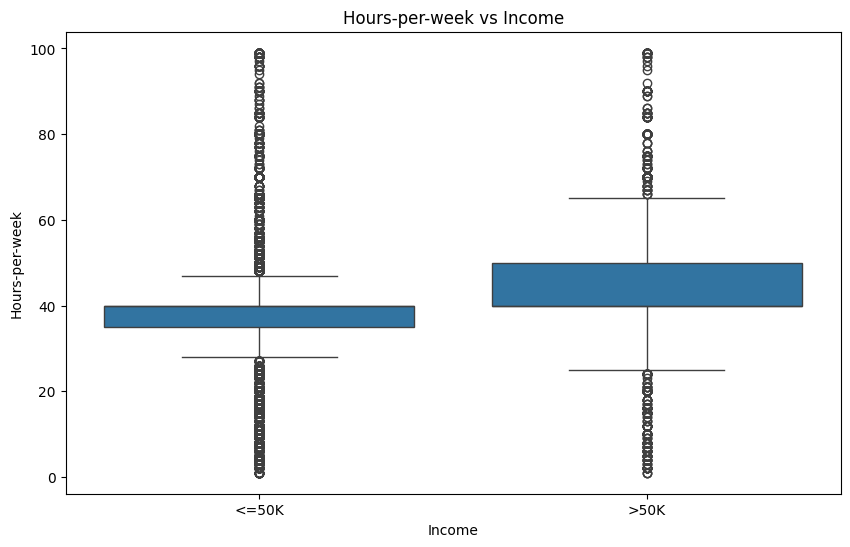

In [63]:
# boxplot hours-per-week
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=merged_data)
plt.title('Hours-per-week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours-per-week')
plt.show()


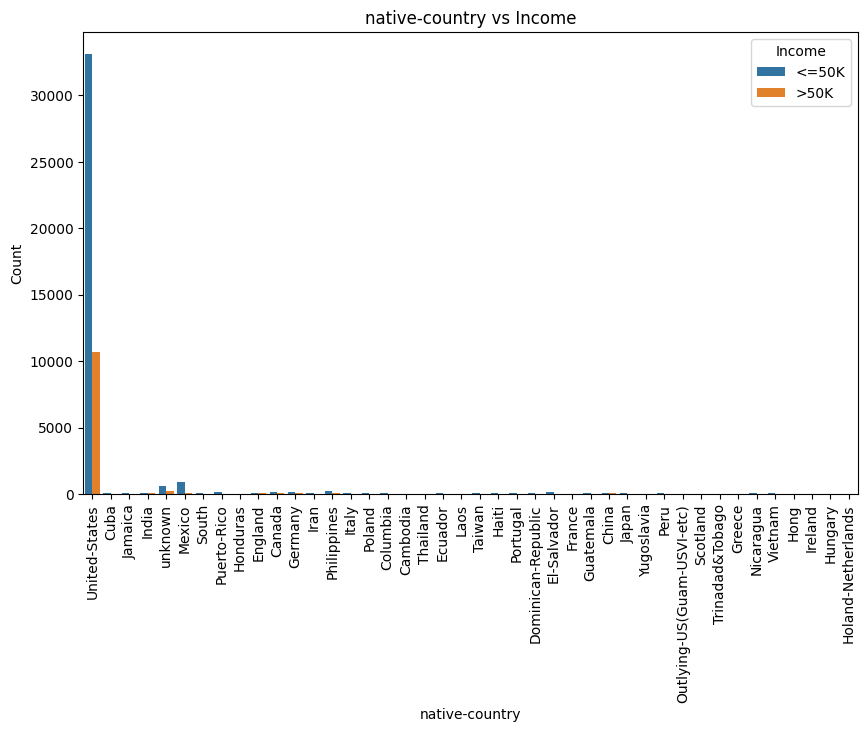

In [64]:
#native-country vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='native-country', hue='income', data=merged_data)
plt.title('native-country vs Income')
plt.xlabel('native-country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


In [65]:
merged_data['native-country'].value_counts()


native-country
United-States                 43792
Mexico                          943
unknown                         856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

##### Most people are from USA this creates unnecessary bias so will drop this column

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_data['workclass'] = le.fit_transform(merged_data['workclass'])
merged_data['education'] = le.fit_transform(merged_data['education'])
merged_data['marital-status'] = le.fit_transform(merged_data['marital-status'])
merged_data['occupation'] = le.fit_transform(merged_data['occupation'])
merged_data['relationship'] = le.fit_transform(merged_data['relationship'])
merged_data['race'] = le.fit_transform(merged_data['race'])
merged_data['sex'] = le.fit_transform(merged_data['sex'])
merged_data['native-country'] = le.fit_transform(merged_data['native-country'])
merged_data['income'] = le.fit_transform(merged_data['income'])
merged_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,9,13,2,0,1,4,1,2174,0,40,38,0
1,50,3,83311,9,13,0,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,2,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,0,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,0,9,5,2,0,0,0,40,4,0


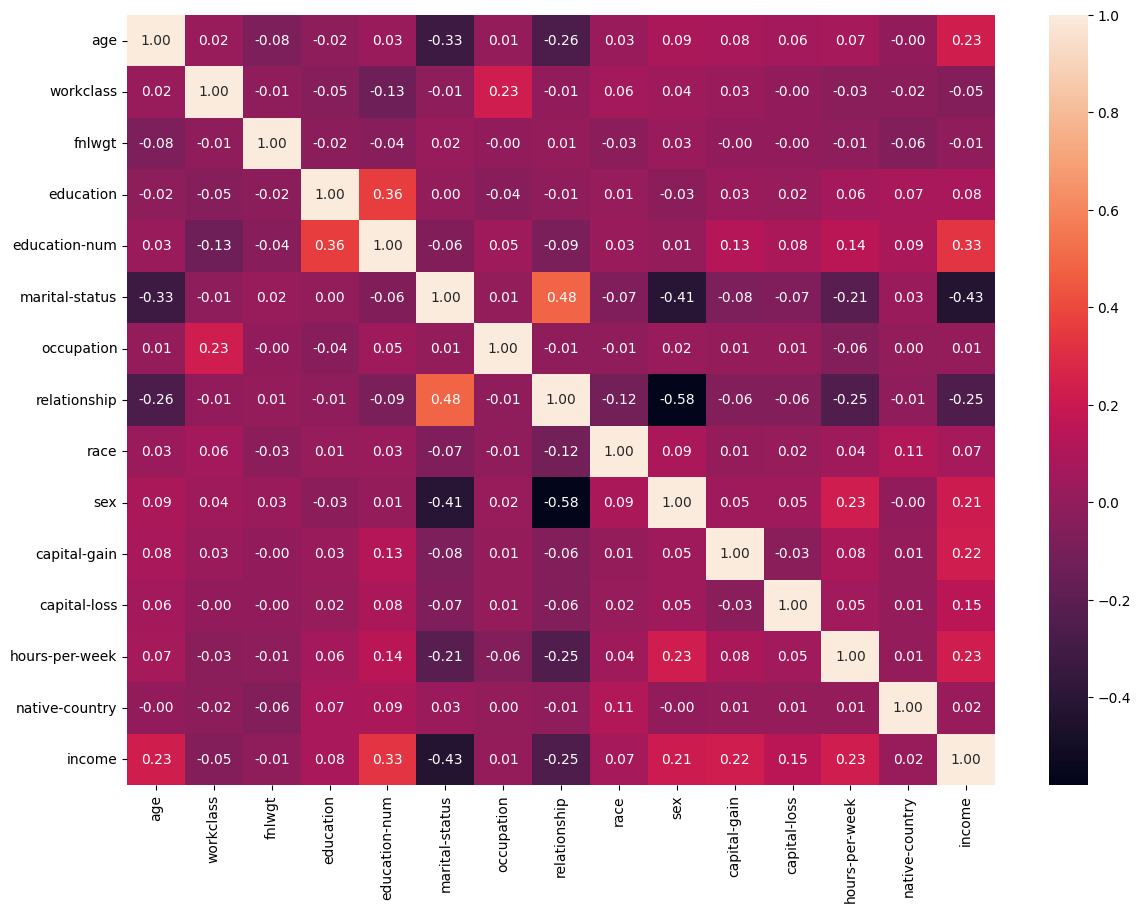

In [67]:
plt.figure(figsize=(14,10))
sns.heatmap(merged_data.corr(),annot=True,fmt='.2f')
plt.show()

#### Can see with proof "education" and "education-num" are highly correlated. Also "marital-status" and "relationship" has a strong correlation. Therefore will drop "education" and "relationship"

In [68]:
merged_data=merged_data.drop(['relationship','education'],axis=1)

#### Will drop "native-country" because of bias and drop "fnlwgt" because it has no correlation with "income"

In [69]:
merged_data=merged_data.drop(['native-country','fnlwgt'],axis=1)

In [70]:
merged_data.head()

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,0,13,2,0,4,1,2174,0,40,0
1,50,3,13,0,3,4,1,0,0,13,0
2,38,2,9,2,5,4,1,0,0,40,0
3,53,2,7,0,5,2,1,0,0,40,0
4,28,2,13,0,9,2,0,0,0,40,0


## Sampling Data - Handle class imbalance

##### Less than 50K has many data rows than Greater than 50K. Therefore sampling is done to handle class imbalance

In [71]:
merged_data['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE object
smote = SMOTE(random_state=42)

# Resample
X_resampled, y_resampled = smote.fit_resample(merged_data.drop(columns=['income']), merged_data['income'])

# Merge resampled dataframes
merged_data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [73]:
merged_data_resampled['income'].value_counts()


income
0    37109
1    37109
Name: count, dtype: int64

In [74]:
merged_data_resampled.shape

(74218, 11)

## Split Dataframe into predictors and target

In [75]:
y = merged_data_resampled[['income']]
merged_data_resampled.drop(columns=['income'], inplace=True)

In [76]:
print(y['income'].unique())

[0 1]


In [77]:
y.shape

(74218, 1)

## Splitting the training and testing dataset and training the model


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#80% training and 20% testing dataset by random shuffle
X_train, X_test, y_train, y_test = train_test_split(merged_data_resampled, y, test_size=0.2, shuffle=True)

In [79]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
rf_classifier.fit(X_train, y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=5, min_samples_leaf=50, n_estimators=50)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculating training accuracy
rf_train_accuracy = rf_classifier.score(X_train, y_train)
print("Random Forest Classifier Training Accuracy:", rf_train_accuracy)

# Calculating testing accuracy
rf_test_accuracy = rf_classifier.score(X_test, y_test)
print("Random Forest Classifier Testing Accuracy:", rf_test_accuracy)

rf_predictions = rf_classifier.predict(X_test)
rf_classification_report = classification_report(y_test, rf_predictions)
print("Classification Report for Random Forest Classifier:\n", rf_classification_report)

# Confusion matrx
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

Random Forest Classifier Training Accuracy: 0.8465826792872301
Random Forest Classifier Testing Accuracy: 0.8444489355968742
Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84      7345
           1       0.83      0.87      0.85      7499

    accuracy                           0.84     14844
   macro avg       0.85      0.84      0.84     14844
weighted avg       0.85      0.84      0.84     14844



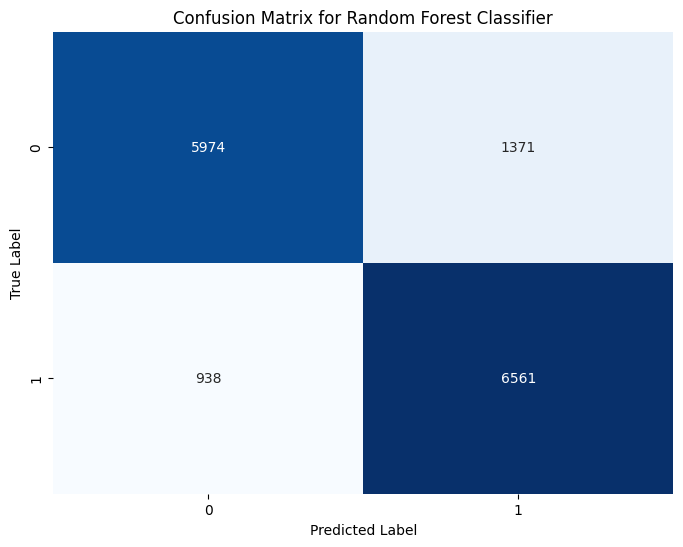

In [81]:
#Confusion matrix for RF 
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [83]:
# Calculate training accry
nb_train_accuracy = nb_classifier.score(X_train, y_train)
print("Naive Bayes Classifier Training Accuracy:", nb_train_accuracy)

# Calculate testing accuracy
nb_test_accuracy = nb_classifier.score(X_test, y_test)
print("Naive Bayes Classifier Testing Accuracy:", nb_test_accuracy)

#Classification report
nb_predictions = nb_classifier.predict(X_test)
nb_classification_report = classification_report(y_test, nb_predictions)
print("Classification Report for Naive Bayes Classifier:\n", nb_classification_report)

#confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)


Naive Bayes Classifier Training Accuracy: 0.6492067234816586
Naive Bayes Classifier Testing Accuracy: 0.6459175424413904
Classification Report for Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.59      0.95      0.73      7345
           1       0.87      0.35      0.50      7499

    accuracy                           0.65     14844
   macro avg       0.73      0.65      0.61     14844
weighted avg       0.73      0.65      0.61     14844



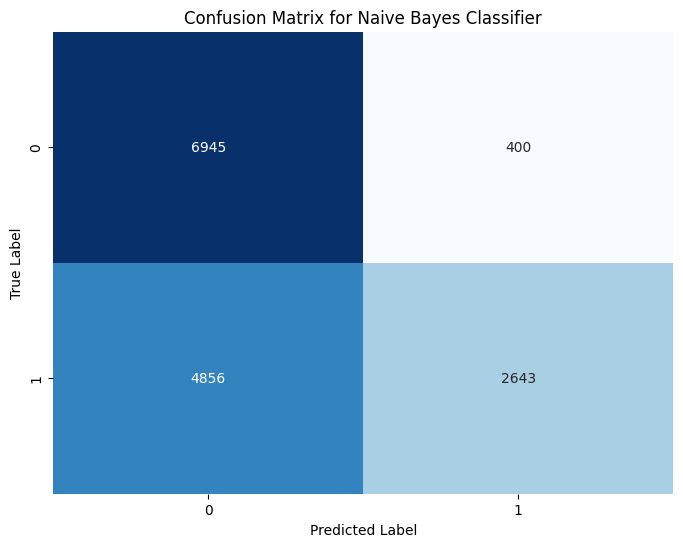

In [84]:

#confusion matrix for NB
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


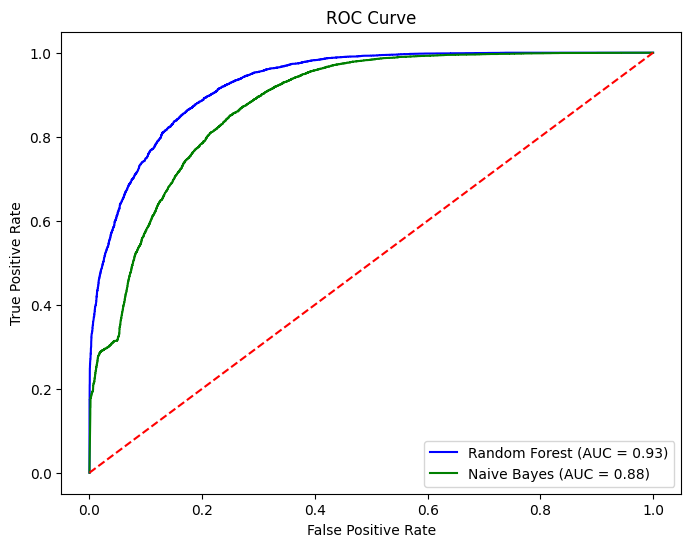

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
# RF Classifier
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# NB Classifier
nb_probs = nb_classifier.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

#ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, color='green', label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarni

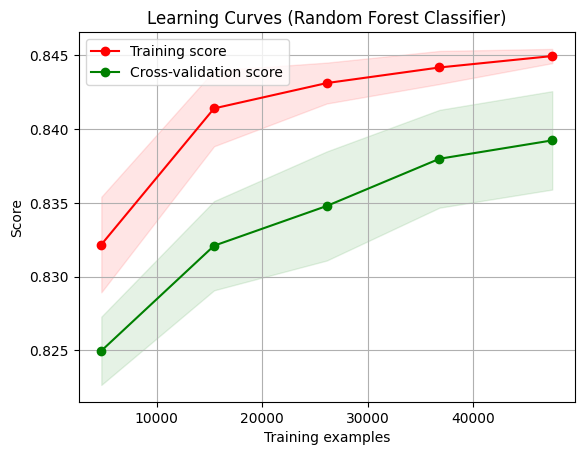

c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversio

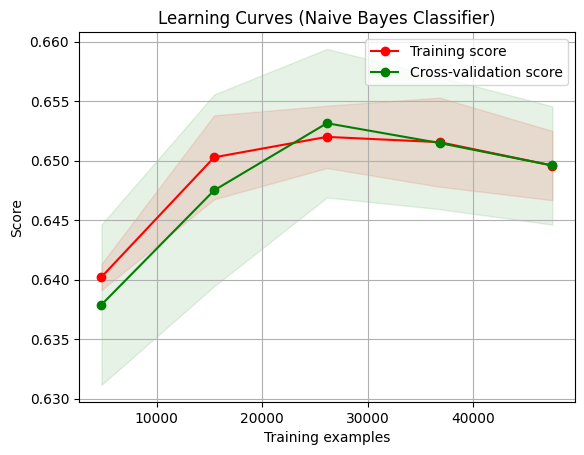

In [86]:
from sklearn.model_selection import learning_curve

#learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#learning curves for RF
title_rf = "Learning Curves (Random Forest Classifier)"
plot_learning_curve(rf_classifier, title_rf, X_train, y_train, cv=5)
plt.show()

# learning curves for NB
title_nb = "Learning Curves (Naive Bayes Classifier)"
plot_learning_curve(nb_classifier, title_nb, X_train, y_train, cv=5)
plt.show()
